In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
# data_gen=image_dataset_from_directory(color_mode='grayscale',labels='inferred',labels='categorical'batch_size=32,)

In [3]:
data_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [4]:
train=data_gen.flow_from_directory('covid_dataset/CNN_Covid19/Train',target_size=(64,64),color_mode='rgb',shuffle=True)

Found 13749 images belonging to 4 classes.


In [5]:
train_images,train_labels=next(train)

In [6]:
print(train.class_indices)

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}


In [26]:
train_images.shape

(32, 64, 64, 3)

In [7]:
train_labels

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [8]:
train_images

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.06428433, 0.06428433, 0.06428433],
         ...,
         [0.4917321 , 0.4917321 , 0.4917321 ],
         [0.32143936, 0.32143936, 0.32143936],
         [0.16576023, 0.16576023, 0.16576023]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.07139609, 0.07139609, 0.07139609],
         ...,
         [0.49228713, 0.49228713, 0.49228713],
         [0.315933  , 0.315933  , 0.315933  ],
         [0.1511109 , 0.1511109 , 0.1511109 ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.07604357, 0.07604357, 0.07604357],
         ...,
         [0.48754108, 0.48754108, 0.48754108],
         [0.30285066, 0.30285066, 0.30285066],
         [0.1336486 , 0.1336486 , 0.1336486 ]],

        ...,

        [[0.21276212, 0.21276212, 0.21276212],
         [0.22639845, 0.22639845, 0.22639845]

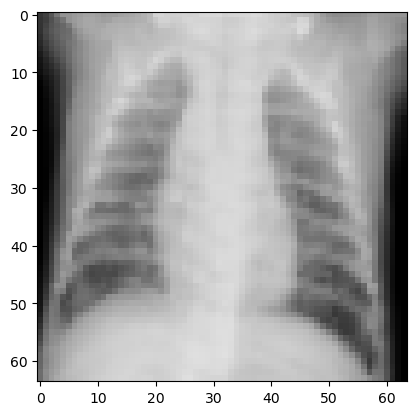

In [9]:
plt.imshow(train_images[1])

In [10]:
val_gen=ImageDataGenerator(rescale=1./255)
val_set=val_gen.flow_from_directory('covid_dataset/CNN_Covid19/Validation',target_size=(64,64),color_mode='rgb')

Found 3756 images belonging to 4 classes.


In [11]:
val_images,val_labels=next(val_set)

In [28]:
val_images.shape

(32, 64, 64, 3)

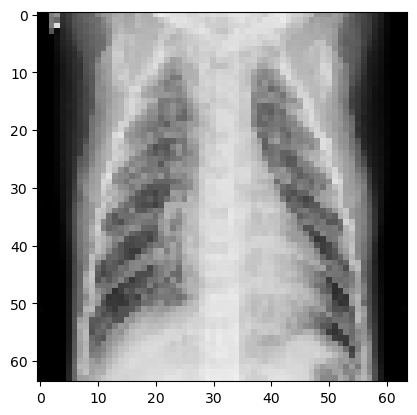

In [12]:
plt.imshow(val_images[1])

In [91]:
val_gen=ImageDataGenerator(rescale=1./255)
test=val_gen.flow_from_directory('covid_dataset/CNN_Covid19/Test',target_size=(64,64),color_mode='rgb',batch_size=64)

Found 3739 images belonging to 4 classes.


In [92]:
test

# Model Generation


In [18]:
model=models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=4,activation='softmax'))

In [19]:
model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['accuracy'])

## Training 

In [20]:
model.fit(train,validation_data=val_set,epochs=16,batch_size=32)

Epoch 1/16
430/430 [==============================] - 107s 248ms/step - loss: 0.9054 - accuracy: 0.6185 - val_loss: 0.7107 - val_accuracy: 0.7284
Epoch 2/16
430/430 [==============================] - 106s 247ms/step - loss: 0.7091 - accuracy: 0.7169 - val_loss: 0.7253 - val_accuracy: 0.7330
Epoch 3/16
430/430 [==============================] - 122s 284ms/step - loss: 0.6204 - accuracy: 0.7567 - val_loss: 0.6189 - val_accuracy: 0.7622
Epoch 4/16
430/430 [==============================] - 117s 273ms/step - loss: 0.5784 - accuracy: 0.7766 - val_loss: 0.6242 - val_accuracy: 0.7625
Epoch 5/16
430/430 [==============================] - 114s 264ms/step - loss: 0.5246 - accuracy: 0.8008 - val_loss: 0.5764 - val_accuracy: 0.7899
Epoch 6/16
430/430 [==============================] - 118s 274ms/step - loss: 0.4970 - accuracy: 0.8089 - val_loss: 0.5270 - val_accuracy: 0.7969
Epoch 7/16
430/430 [==============================] - 102s 237ms/step - loss: 0.4752 - accuracy: 0.8188 - val_loss: 0.5304 -

In [93]:
test_sample, test_labels = next(test)

In [95]:
test_sample.shape

(64, 64, 64, 3)

In [96]:
y_pred=model.predict(test_sample)

2/2 [==============================] - 0s 30ms/step


In [98]:
y_pred.shape

(64, 4)

In [99]:
print(train.class_indices)

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}


In [100]:
predict_labels=[]
labels=['Covid','Lung_Opacity',"Normal","Virual Pneumonia"]
for i in range(len(y_pred)):
    z=y_pred[i].argmax()
    predict_labels.append(labels[z])
    

In [101]:
predict_labels

['Normal',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Virual Pneumonia',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Covid',
 'Lung_Opacity',
 'Lung_Opacity']

In [102]:
scores=model.evaluate(test)

59/59 [==============================] - 13s 227ms/step - loss: 0.5373 - accuracy: 0.7957


In [103]:
print("test_accuracy : ")
print(scores[1])

test_accuracy : 
0.795667290687561


In [41]:
import PIL
import numpy as np

In [61]:
img_data=np.random.random(size=(64,64,3))

In [62]:
img_data.shape

(64, 64, 3)

In [104]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array,load_img

In [119]:
img=load_img('C:/Users/Rehan/Dropbox/PC/Desktop/COVID-3131.png',color_mode='rgb',target_size=(64,64))

img_1=img_to_array(img)
test_img=np.expand_dims(img_1,axis=0)

In [120]:
test_img.shape

(1, 64, 64, 3)

In [121]:
model.predict(test_image)

1/1 [==============================] - 0s 29ms/step


array([[1., 0., 0., 0.]], dtype=float32)